In [2]:
from src.etl import *
from src.model_pillars import *

In [5]:
pe = PillarExplainer(mod='ensemble', include_svr=True)

In [6]:
pe.get_models()

Score of Lasso busi model: 0.9742543817421513
Score of ElasticNet busi model: 0.9742543817421513

Score of SVR busi model: 0.9550703126973137
Score of Lasso econ model: 0.9785821377329906
Score of ElasticNet econ model: 0.9785821377329906

Score of SVR econ model: 0.9789420452358539
Score of Lasso educ model: 0.9875595600569135
Score of ElasticNet educ model: 0.9875647219133855

Score of SVR educ model: 0.9808645693002619
Score of Lasso envi model: 0.965729149836769
Score of ElasticNet envi model: 0.965729149836769

Score of SVR envi model: 0.9444371224985979
Score of Lasso gove model: 0.9901125330976617
Score of ElasticNet gove model: 0.9901125330976617

Score of SVR gove model: 0.9848217531274613
Score of Lasso heal model: 0.9565284429474998
Score of ElasticNet heal model: 0.9565284429474998

Score of SVR heal model: 0.9591479421746906
Score of Lasso pers model: 0.9532616949385737
Score of ElasticNet pers model: 0.9532616949385737

Score of SVR pers model: 0.9521654214218369
Score of

In [7]:
pe.models

{'busi': ElasticNet(alpha=0.1, l1_ratio=1.0),
 'econ': SVR(C=2),
 'educ': ElasticNet(alpha=0.1, l1_ratio=0.8888888888888888),
 'envi': Lasso(alpha=0.1),
 'gove': Lasso(alpha=0.1),
 'heal': SVR(C=2),
 'pers': ElasticNet(alpha=0.1, l1_ratio=1.0),
 'safe': SVR(C=2),
 'soci': SVR(C=1)}

Score of Lasso busi model: 0.9742543817421513
Score of ElasticNet busi model: 0.9742543817421513

Score of Lasso econ model: 0.9785821377329906
Score of ElasticNet econ model: 0.9785821377329906

Score of Lasso educ model: 0.9875595600569135
Score of ElasticNet educ model: 0.9875647219133855

Score of Lasso envi model: 0.965729149836769
Score of ElasticNet envi model: 0.965729149836769

Score of Lasso gove model: 0.9901125330976617
Score of ElasticNet gove model: 0.9901125330976617

Score of Lasso heal model: 0.9565284429474998
Score of ElasticNet heal model: 0.9565284429474998

Score of Lasso pers model: 0.9532616949385737
Score of ElasticNet pers model: 0.9532616949385737

Score of Lasso safe model: 0.9017329697487808
Score of ElasticNet safe model: 0.9017329697487808

Score of Lasso soci model: 0.22394242064772696
Score of ElasticNet soci model: 0.22394242064772696

Plots saved in figures/shap_plots/


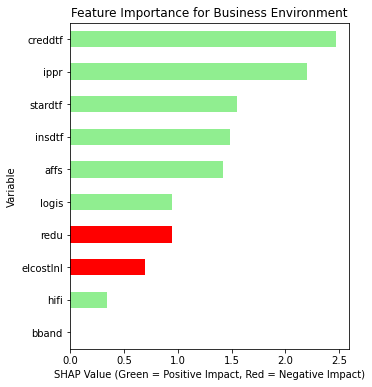

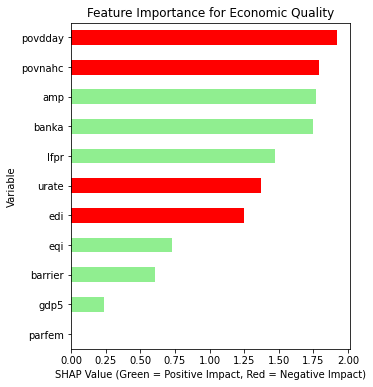

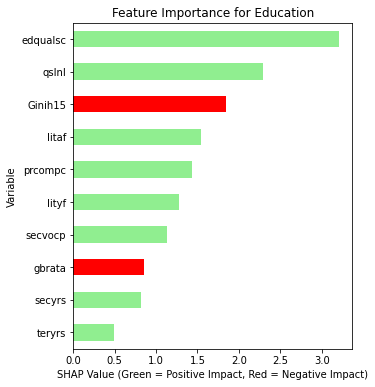

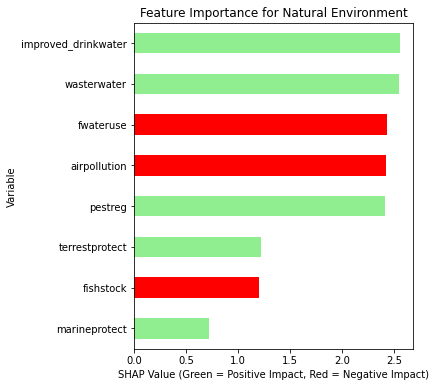

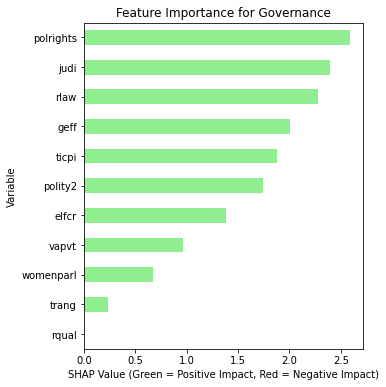

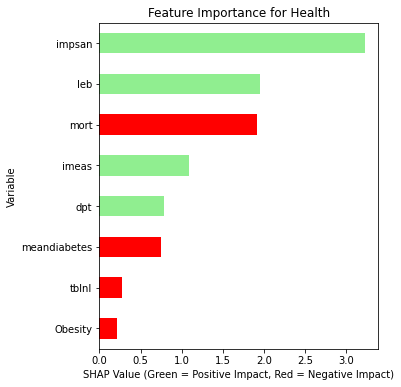

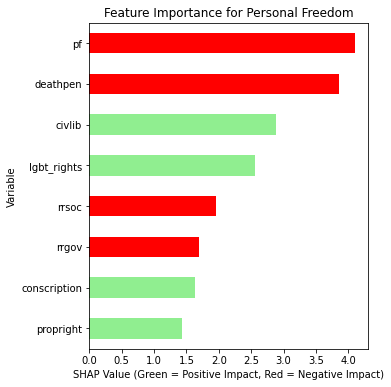

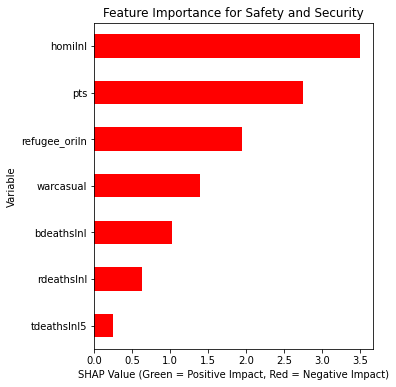

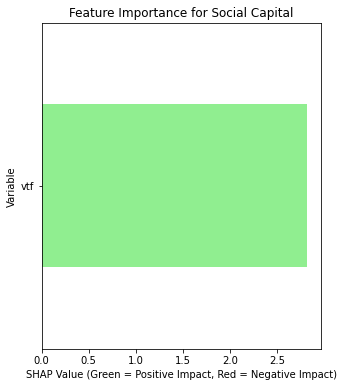

In [4]:
pe.get_model_explainers()

In [3]:
X_val = pe.get_model('busi')[1]

Score of Lasso busi model: 0.9742543817421513


Score of Lasso busi model: 0.9742543817421513


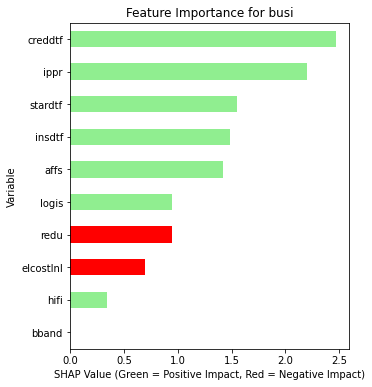

In [4]:
pe.get_impt_cat('busi')

**Question 4**

**Get Pillar with most significant impact in country's overall prosperity score**


In [66]:
def plot_country_pillar(data, country, pillar):
    '''
    Plots country pillar values vs prosperity values with sns.lmplot
    'data' is a subset of prosperity data as produced by get_prosperity_scores()
    '''
    pillar_dict = {'econ':'Economic Quality', 'busi':'Business Environment', 'gove':'Governance',\
                   'educ':'Education', 'heal':'Health', 'safe':'Safety and Security', 'pers':'Personal Freedom',\
                   'soci':'Social Capital', 'envi':'Natural Environment'}
    country_data = data[data['country'] == country]
    sns.lmplot(data=country_data, x=pillar, y='prosperity');
    plt.grid();
    plt.title(f'{pillar_dict[pillar]} vs Prosperity Scores for {country} (2007-2014)');
    plt.xlabel(f'{pillar_dict[pillar]} score', fontsize=15);
    plt.ylabel('Prosperity score', fontsize=15);
    if os.path.exists('figures/impactful_pillars')==False: os.mkdir('figures/impactful_pillars')
    plt.savefig(f'figures/impactful_pillars/{country}_impactful_pillar.png', dpi=800, bbox_inches='tight');
    plt.close();

In [11]:
def top_five_countries_pillars(plot=False):
    '''
    Analysis for the second part of question 4: 
    Finds the most impactful pillar for the top five growing countries by prosperity
    Plots most impactful pillar vs overall prosperity for each country and saves as a .png
    '''
    top_five_grow = ['Chad', 'Togo', 'Zimbabwe', 'Ivory Coast', 'Georgia']
    prosperity_data = pd.read_csv('prosperity.csv')
    top_five_data = prosperity_data[prosperity_data['country'].isin(top_five_grow)]
    top_five_data = top_five_data[['country']+list(top_five_data.columns[4:])]
    corr_pillars = top_five_data.groupby('country').apply(lambda x: x.corr()['prosperity'])
    top_pillars = top_five_data.groupby('country').apply(lambda x: x.corr()['prosperity'].iloc[:-1].idxmax())
    top_pillars_dict = top_pillars.to_dict()
    top_pillars_corr = {}
    if plot==True:
        for country in top_pillars_dict:
            pillar = top_pillars_dict[country]
            plot_country_pillar(top_five_data, country, pillar)
    return top_pillars, corr_pillars, prosperity_data

In [12]:
_, corr, prosperity = top_five_countries_pillars(False)

In [14]:
prosperity.to_csv('prosperity.csv', index=False)

In [10]:
corr

prosperity,busi,econ,educ,envi,gove,heal,pers,safe,soci,prosperity
country,,,,,,,,,,
Chad,0.896061,0.232560,0.847771,0.896600,0.523609,0.931824,0.746379,0.822714,0.604106,1.0
Georgia,0.965294,0.737448,0.952867,0.892389,0.971826,-0.077298,0.967739,0.899603,0.858442,1.0
Ivory Coast,0.929509,0.635361,0.750856,0.798516,0.948271,0.403315,0.873303,-0.020062,0.914083,1.0
Togo,0.973432,0.961710,0.866390,0.982666,0.922433,0.887006,0.971749,-0.211530,0.906475,1.0
Zimbabwe,0.891378,0.994709,0.805860,0.922827,0.950426,0.965502,0.933368,0.957074,0.891087,1.0
